# Plotting the Quantum Harmonic Oscillator

Q. A small ball of mass $0.1 mg$ is attached to a spring of spring constant $k = 10^{-4} kg s^{-2}$. Plot the probablity amplitude $\psi$ vs $x$. The velocity at equillibrium is $1 m/s$.

Ans. We have given the mass $m$ of the ball and the spring constant $k$ of the spring, we can calculate the angular frequency as 


$$ \omega = \sqrt{\frac{k}{m}} $$

$m = 10^{-7} kg \quad k = 10^{-4} kg s^{-2}$

By putting these valures we get $\omega = 31.6227 sec^{-1}
$


Now the solution for time indepadent Schr$\ddot{o}$dinger equation looks like this


$$
\psi_n(x) = \left(\frac{m\omega}{\pi\hbar}\right)^{1/4} \frac{1}{\sqrt{2^n n!}} H_n(\xi) e^{-\frac{\xi}{2}}$$

Where $\xi = \sqrt{\frac{m\omega}{\hbar}}x$ 

But this $\hbar$  is so small so we can't reallt plot this. To plot this we have to choose a natural scale for $\psi$. Because this solution is normalizable we know that

$$\int^{\infty}_{-\infty} |\psi(x)|^2 dx = 1$$

from her we can conclude that $\psi$ has dimenssions of $L^{-1/2}$. The qunatity $\left(\frac{m\omega}{\hbar}\right)^{1/4}$ has the same dimession so we can introduce a dimenssionless $\psi$ such that 
$$\phi = \frac{\psi}{\left(\frac{m\omega}{\hbar}\right)^{1/4}}$$

So now the equation reads

$$\phi_n(\xi) = \frac{\pi^{-1/4}}{\sqrt{2^n n!}} H_n(\xi) e^{-\frac{\xi}{2}}$$

Where $\xi = \sqrt{\frac{m\omega}{\hbar}}x \quad$  and $H_n$ is the Hermite polynomial of degree $n$.

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [69]:
m = 1e-7
k = 1e-4
pi = math.pi
omega = math.sqrt(k/m)

In [70]:
# fectorial function
def fect(n):
    if n == 0:
        return 1
    else:
        return n*fect(n-1)

In [71]:
#hermite polynomial
def H(n):
    def f(x):
        if n == 0:
            return 1
        elif n == 1:
            return 2*x
        else:
            return (2*x*H(n-1)(x) - 2*(n-1)*H(n-2)(x))
    return f

In [72]:
H(3)(1)

-4

In [73]:
def phi(n):
    def f(xi):
        return (pi)**-0.25*(1/math.sqrt(2**n*fect(n)))*H(n)(xi)*math.exp(-xi**2/2)
    return f

In [74]:
xs = np.linspace(-5,5,1000)

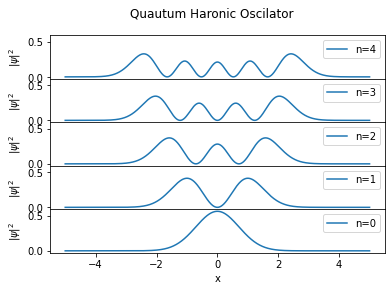

In [124]:
n = 5
fig = plt.figure()
gs = fig.add_gridspec(n, hspace=0)
ax = gs.subplots(sharex=True, sharey=True)
fig.suptitle('Quautum Haronic Oscilator')
for i in range(n):
        ys = [(phi(i)(x))**2 for x in xs]
        ax[n-1-i].plot(xs,ys, label=f"n={i}")
        ax[n-1-i].legend();
for a in ax:
    a.label_outer()
    a.set(ylabel = '$|\psi|^2$', xlabel = "x")
plt.legend();